In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in the data
data=pd.read_csv("Desktop/datasets/vgsales.csv")
data
# Sales in millions

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
print(data["Year"].dtype)

# Year column is in float
# Int is more suitable for years

# Clear the Nan values and convert to int type
data.dropna(inplace=True)
data["Year"] = data["Year"].astype(np.int16)

print(data["Year"].dtype)

float64
int16


## Which games have been the most successful?

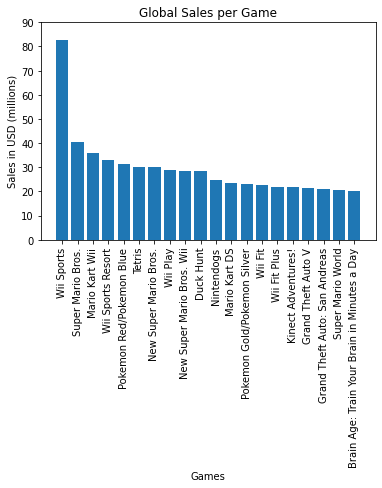

In [4]:
# Plotting the top 20 games

temp = data.sort_values(by="Global_Sales", ascending=False)[:20]
plt.bar(temp.Name, temp["Global_Sales"])
plt.xticks(temp.Name, rotation=90)
plt.ylim(0,90)
plt.xlabel("Games")
plt.ylabel("Sales in USD (millions)")
plt.title("Global Sales per Game")
plt.show()

# Wii Sports is clearly way above all other games with respect to sales

## Which publisher has made the best games?

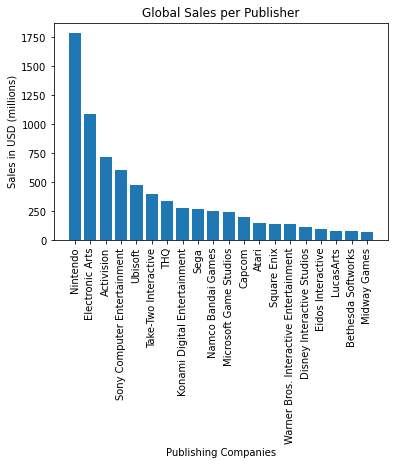

In [5]:
temp = data.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:20]
plt.bar(temp.index, temp)
plt.xticks(rotation=90)
plt.xlabel("Publishing Companies")
plt.ylabel("Sales in USD (millions)")
plt.title("Global Sales per Publisher")
plt.show()

# Nintendo is clearly the winner here with the most sales

## What year was the golden year for games?

### In terms of sales

The year with max sales: 2008


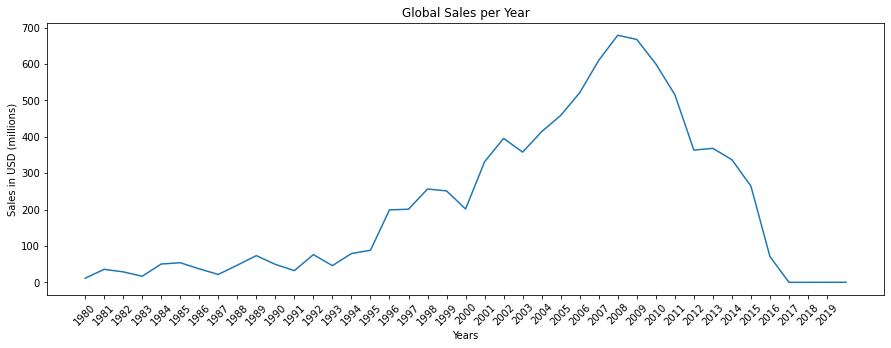

In [6]:
temp = data.groupby("Year")["Global_Sales"].sum()
print("The year with max sales:", temp.idxmax())
plt.figure(figsize=(15,5))
plt.plot(temp.index, temp)
plt.xticks(np.arange(1980, 2020, step=1), rotation=45)
plt.xlabel("Years")
plt.ylabel("Sales in USD (millions)")
plt.title("Global Sales per Year")
plt.show()

# The trend is quite clear
# The 2000s were the golden period for sales, and have largely dropped in the 2010s
# Some hypotheses can be made as to wy 2008 was the peak
# The financial crisis may have affected game sales, which haven't been able to recover since
# It is possible that sales were high during that time, because more games were published then
# Let us see if this is true

### In terms of number of games released

The year with most releases: 2009


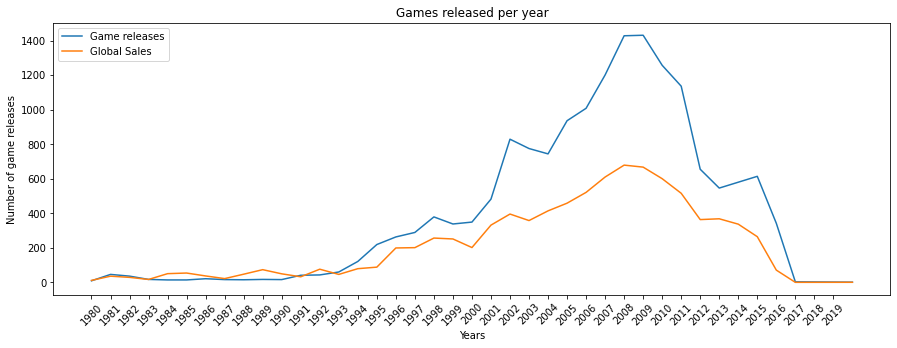

In [7]:
temp = data.copy()
temp = temp.groupby("Year").count()["Name"]

# Overlay the previous plot onto this one to see the correlation

temp_ = data.groupby("Year")["Global_Sales"].sum()
print("The year with most releases:", temp.idxmax())
plt.figure(figsize=(15,5))
plt.plot(temp.index, temp, label="Game releases")
plt.plot(temp_.index, temp_, label="Global Sales")
plt.xticks(np.arange(1980, 2020, step=1), rotation=45)
plt.xlabel("Years")
plt.ylabel("Number of game releases")
plt.title("Games released per year")
plt.legend(loc="upper left")
plt.show()

# Axis labels only apply to the "Games released" plot

# The second hypothesis somewhat holds true
# There is a clear correlation b/w sales and games released
# This makes intuitive sense. More games, more sales

## Which genre of games has been most popular?

### In terms of sales

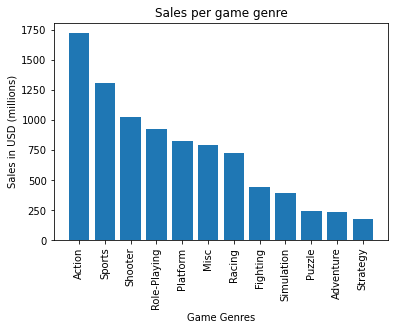

In [8]:
genre = data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
plt.bar(genre.index, genre)
plt.xticks(genre.index, rotation=90)
plt.title("Sales per game genre")
plt.xlabel("Game Genres")
plt.ylabel("Sales in USD (millions)")
plt.show()

# Action games have had the most sales, whereas Strategy games are at the bottom
# Again, this may be due to the fact that a lot more action games are released than other types
# Let us check if this may be the case

### In terms of games released

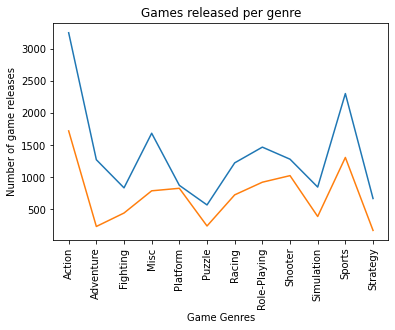

In [9]:
temp = data.groupby("Genre").count()["Name"]
genre = data.groupby("Genre")["Global_Sales"].sum()

# Like previously, we will overlay the plots
plt.plot(temp.index, temp, label="Game releases")
plt.plot(genre.index, genre, label="Sales")
plt.xticks(genre.index, rotation=90)
plt.title("Games released per genre")
plt.xlabel("Game Genres")
plt.ylabel("Number of game releases")
plt.show()

# Axis labels only apply to the "Game releases" plot
# As we can see, there is again a correlationn b/w number of game releases and sales
# More action games are released, thus more of them are sold
# It is also important to note that this may be a feedback loop
# Maybe more action games are released because companies see that 
# action games are more popular and will sell better

## Which platform is the most popular?

### In terms of game sales

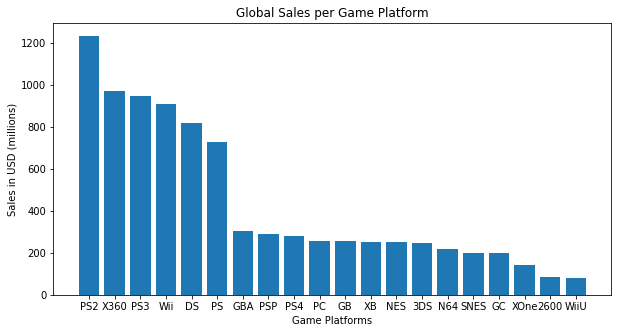

In [10]:
temp = data.groupby("Platform").sum()["Global_Sales"].sort_values(ascending=False)[:20]
plt.figure(figsize=(10,5))
plt.bar(temp.index, temp)
plt.title("Global Sales per Game Platform")
plt.xlabel("Game Platforms")
plt.ylabel("Sales in USD (millions)")
plt.show()

# The PS2 has seen the most sales, followed by the Xbox360
# Like previously, let us see if this is because PS2 offers more games

### In terms of games released

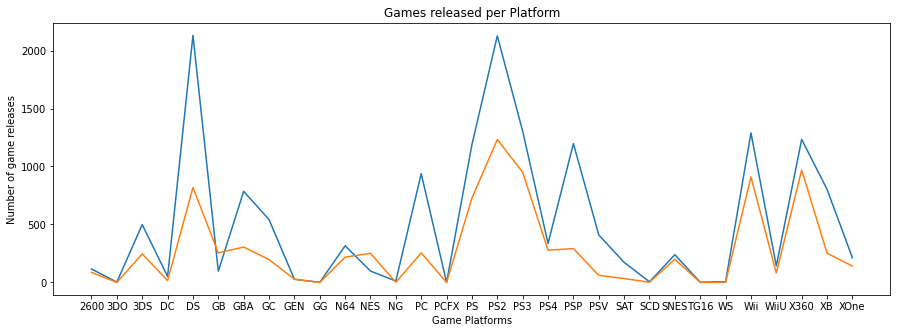

In [11]:
temp = data.groupby("Platform").count()["Name"]
temp_ = data.groupby("Platform").sum()["Global_Sales"]

# Like previously, we will overlay the plots
plt.figure(figsize=(15,5))
plt.plot(temp.index, temp, label="Games released")
plt.plot(temp_.index, temp_, label="Sales")
plt.title("Games released per Platform")
plt.xlabel("Game Platforms")
plt.ylabel("Number of game releases")
plt.show()

# Yes, it does seem like the hypothesis is somewhat true
# The PS2 does have a lot of sales, along with the other top games in the previous plot

## What is the relationship b/w the year and regional sales

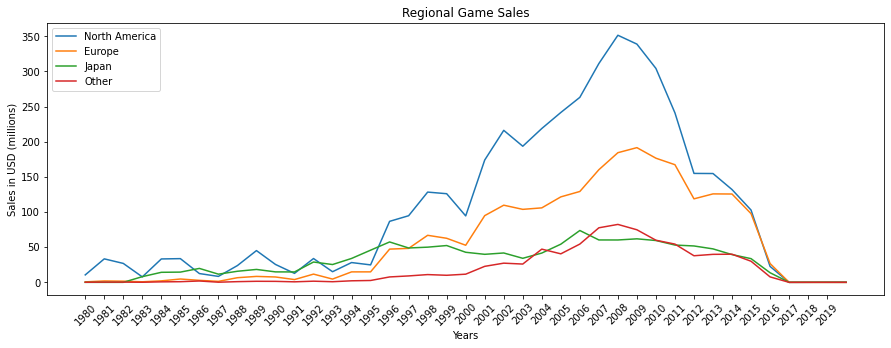

In [12]:
temp = data.groupby("Year").sum()

plt.figure(figsize=(15,5))
plt.plot(temp.index, temp["NA_Sales"], label="North America")
plt.plot(temp.index, temp["EU_Sales"], label="Europe")
plt.plot(temp.index, temp["JP_Sales"], label="Japan")
plt.plot(temp.index, temp["Other_Sales"], label="Other")
plt.xticks(np.arange(1980, 2020, step=1), rotation=45)
plt.xlabel("Years")
plt.ylabel("Sales in USD (millions)")
plt.title("Regional Game Sales")
plt.legend(loc="upper left")
plt.show()

# It is quite clear that North America is the biggest market for video games
# There is however, a similar trend in terms of sales for each of the regions, with a peak around 2008

### Is there a relationship b/w publisher and regional sales?

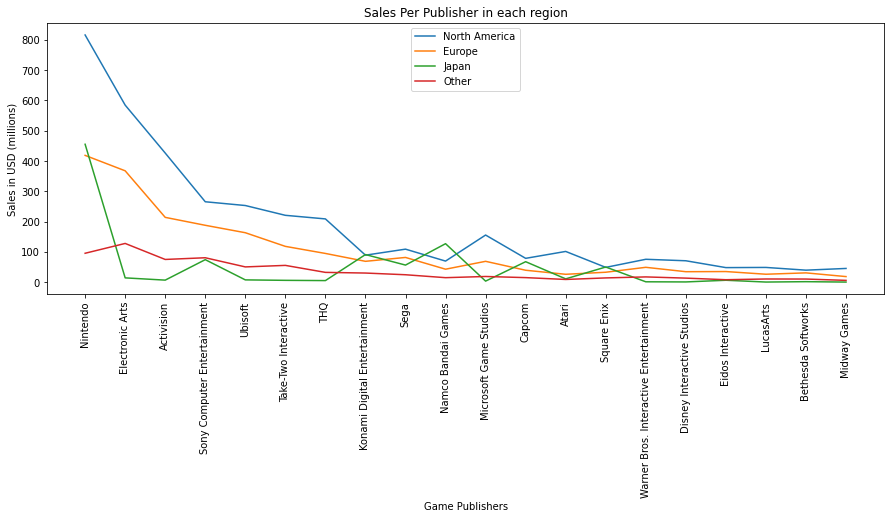

In [13]:
temp = data.groupby("Publisher").sum().sort_values(by="Global_Sales",ascending=False)[:20]

plt.figure(figsize=(15,5))
plt.plot(temp.index, temp["NA_Sales"], label="North America")
plt.plot(temp.index, temp["EU_Sales"], label="Europe")
plt.plot(temp.index, temp["JP_Sales"], label="Japan")
plt.plot(temp.index, temp["Other_Sales"], label="Other")
plt.xticks(temp.index, rotation=90)
plt.legend(loc="upper center")
plt.xlabel("Game Publishers")
plt.ylabel("Sales in USD (millions)")
plt.title("Sales Per Publisher in each region")
plt.show()

# It appears that Nintendo is quite popular in Japan
# Not surprising since it is a Japanese company

## Do certain game genres sell better in certain regions?

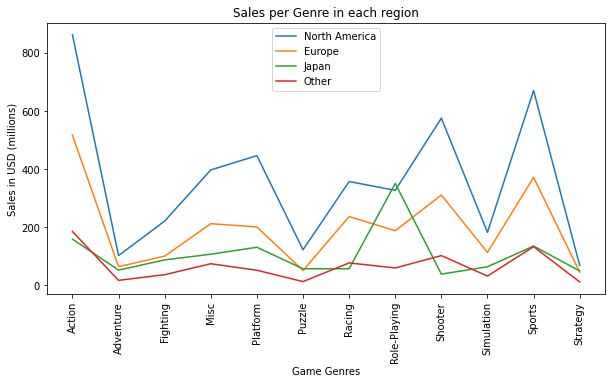

In [14]:
temp = data.groupby("Genre").sum()

plt.figure(figsize=(10,5))
plt.plot(temp.index, temp["NA_Sales"], label="North America")
plt.plot(temp.index, temp["EU_Sales"], label="Europe")
plt.plot(temp.index, temp["JP_Sales"], label="Japan")
plt.plot(temp.index, temp["Other_Sales"], label="Other")
plt.xticks(temp.index, rotation=90)
plt.title("Sales per Genre in each region")
plt.xlabel("Game Genres")
plt.ylabel("Sales in USD (millions)")
plt.legend(loc="upper center")
plt.show()

# It appears that role-playing games are especially popular in Japan
# Whereas adventure, puzzle, and simulation games are less popular across all regions